# Variable Distribution Type Tests (Gaussian)
- Shapiro-Wilk Test
- D’Agostino’s K^2 Test
- Anderson-Darling Test

In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
sns.set(font_scale=2, palette= "viridis")
from scipy import stats

In [3]:
data = pd.read_csv('../data/pulse_data.csv')
data.head() 

,Height,Weight,Age,Gender,Smokes,Alcohol,Exercise,Ran,Pulse1,Pulse2,BMI,BMICat
0,1.73,57.0,18,Female,No,Yes,Moderate,No,86.0,88.0,19.045073,Underweight
1,1.79,58.0,19,Female,No,Yes,Moderate,Yes,82.0,150.0,18.101807,Underweight
2,1.67,62.0,18,Female,No,Yes,High,Yes,96.0,176.0,22.230987,Normal
3,1.95,84.0,18,Male,No,Yes,High,No,71.0,73.0,22.090730,Normal
4,1.73,64.0,18,Female,No,Yes,Low,No,90.0,88.0,21.383942,Normal


## Visual Normality Check 

In [4]:
data.Height.describe() 

count    108.000000
mean       1.732685
std        0.101213
min        1.400000
25%        1.660000
50%        1.730000
75%        1.800000
max        1.950000
Name: Height, dtype: float64

In [5]:
data.skew()

Height   -0.176668
Weight    0.870199
Age       4.052283
Pulse1    1.511106
Pulse2    0.845562
BMI       0.680413
dtype: float64

In [6]:
data.kurtosis() 

Height     0.191997
Weight     0.486003
Age       20.000021
Pulse1     7.881765
Pulse2    -0.514270
BMI        0.310352
dtype: float64

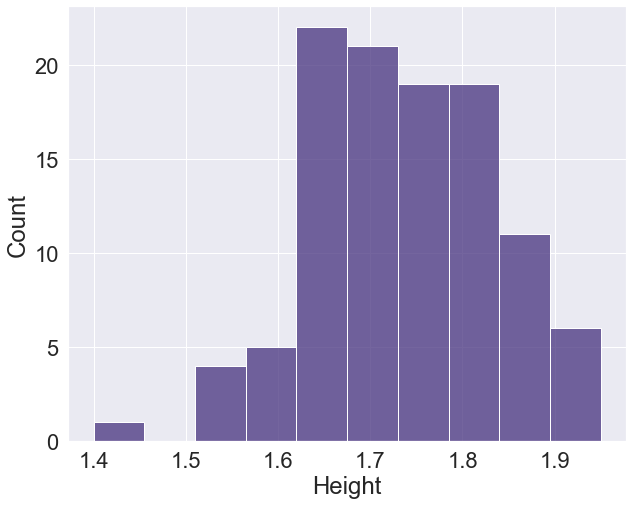

In [7]:
plt.figure(figsize=(10,8))
sns.histplot(data=data, x='Height')
plt.show()

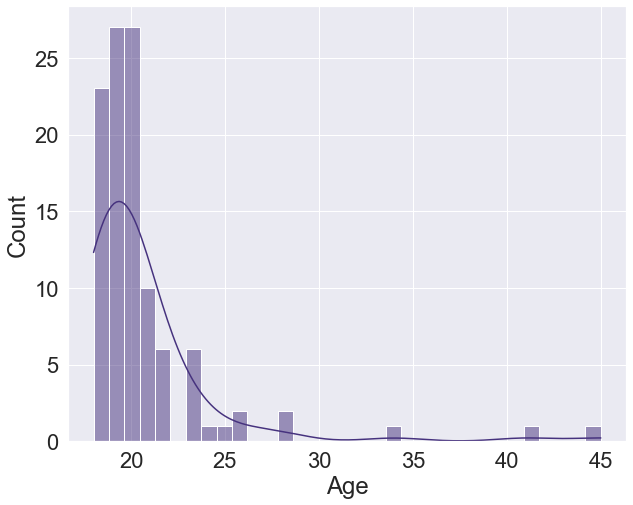

In [8]:
plt.figure(figsize=(10,8))
sns.histplot(data=data, x='Age', kde=True)
plt.show()

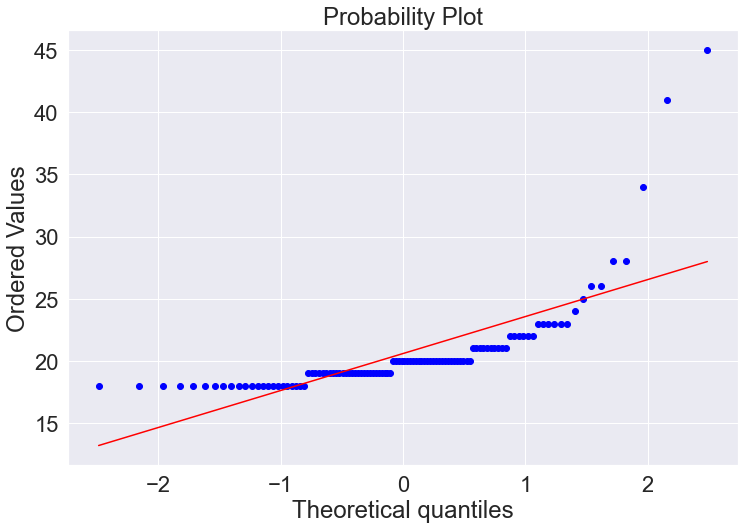

In [9]:
# Checking for normality by Q-Q plot graph
plt.figure(figsize=(12, 8))
stats.probplot(data['Age'], plot=plt, dist='norm')
plt.show()

__the data should be on the red line. If there are data points that are far off of it, it’s an indication that there are some deviations from normality.__

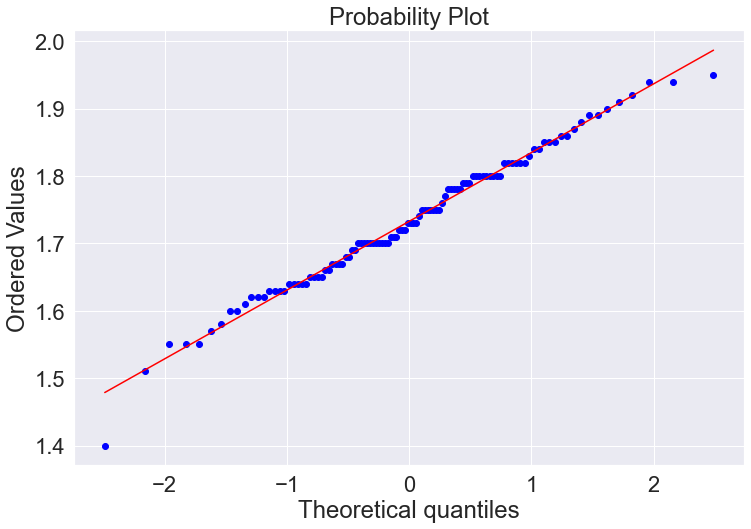

In [10]:
# Checking for normality by Q-Q plot graph
plt.figure(figsize=(12, 8))
stats.probplot(data['Height'], plot=plt, dist='norm')
plt.show()

__the data should be on the red line. If there are data points that are far off of it, it’s an indication that there are some deviations from normality.__

## Shapiro-Wilk Test
Tests whether a data sample has a Gaussian distribution/normal distribution.

### Assumptions
Observations in each sample are independent and identically distributed (iid).

### Interpretation
- H0: The sample has a Gaussian/normal distribution.
- Ha: The sample does not have a Gaussian/normal distribution.

In [11]:
stats.shapiro(data['Age'])

ShapiroResult(statistic=0.5615497827529907, pvalue=1.9952150916661683e-16)

In [13]:
stat, p_value = stats.shapiro(data['Age'])
print(f'statistic = {stat}, p-value = {p_value}')

alpha = 0.05 
if p_value > alpha: 
    print("The sample has normal distribution(Fail to reject the null hypothesis, the result is not significant)")
else: 
    print("The sample does not have a normal distribution(Reject the null hypothesis, the result is significant)")

statistic = 0.5615497827529907, p-value = 1.9952150916661683e-16
The sample does not have a normal distribution(Reject the null hypothesis, the result is significant)


## D’Agostino’s K^2 Test
Tests whether a data sample has a Gaussian distribution/normal distribution.

### Assumptions
Observations in each sample are independent and identically distributed (iid).

### Interpretation
- H0: The sample has a Gaussian/normal distribution.
- Ha: The sample does not have a Gaussian/normal distribution.

In [14]:
stats.normaltest(data['Age'])

NormaltestResult(statistic=122.49885849029914, pvalue=2.510214645667701e-27)

In [ ]:
stat, p_value = stats.normaltest(data['Age'])
print(f'statistic = {stat}, p-value = {p_value}')
alpha = 0.05 
if p_value > alpha: 
    print("The sample has normal distribution(Fail to reject the null hypothesis, the result is not significant)")
else: 
    print("The sample does not have a normal distribution(Reject the null hypothesis, the result is significant)")

__Remember__
- If Data Is Gaussian:
	- Use Parametric Statistical Methods
- Else:
	- Use Nonparametric Statistical Methods